In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt

In [37]:
def gaussian(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

def boxcar(x):
    return 0.5*(np.abs(x) <= 1)

def epanechnikov(x):
    return 0.75*(1 - x**2)*(np.abs(x) <= 1)

In [38]:
def make_kde(X_, ker=gaussian, h=0.5):
    def kde(X):
        K = ker((X - X_)/h)
        return np.sum(K, axis=0)/(h*len(X_))
    return kde

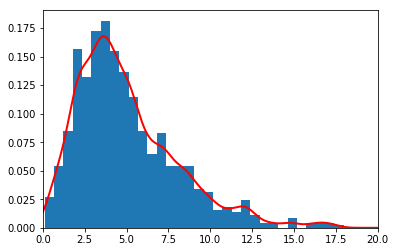

In [39]:
X = np.arange(0, 20, 0.01)
X_ = np.random.chisquare(5, size=800).reshape(-1, 1)

kde = make_kde(X_)
y = kde(X)

plt.xlim(0, 20)
plt.plot(X, y, 'r', linewidth=2)
plt.hist(X_, bins=40, density=True)
plt.show()

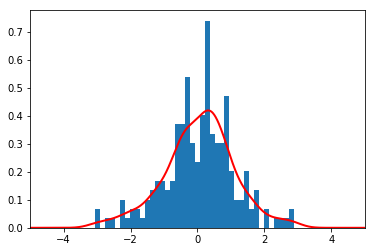

In [51]:
X = np.arange(-5, 5, 0.01)
X_ = np.random.normal(size=200).reshape(-1, 1)

kde = make_kde(X_, h=0.3)
y = kde(X)

plt.xlim(-5, 5)
plt.plot(X, y, 'r', linewidth=2)
plt.hist(X_, bins=40, density=True)
plt.show()